# Linear Regression - Single Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv(r"C:\Users\moses\Documents\Git\Trading\Data\ML - basiccode\homeprices.txt")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


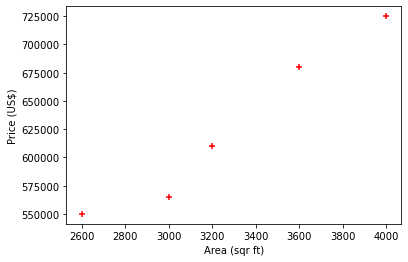

In [3]:
# PLT magic function that allows graphs to be shown in notebook - no longer need to use plt.show()?
%matplotlib inline

# Plot scatter graph
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')

plt.scatter(df.area, df.price, color = 'red' , marker = '+')

In [4]:
# Double sq brackets returns a dataframe
df[['area']]

# Single sq bracket returns a series
df['area']

# Returns a series for both
df['price']
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [5]:
# Create linear regression object
reg = linear_model.LinearRegression()

# Fit data - training the model
    # Double sq bracket used for X because function requires a dataframe
reg.fit(df[['area']], df.price)

# Get prediction - API changed, hence using double brackets
reg.predict([[3300]])

c:\Users\moses\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
# Get coefficient and intercept of line fitted
print(reg.coef_)
print(reg.intercept_)

[135.78767123]
180616.43835616432


#### Linear Reg with *Different set of Data*

In [11]:
d = pd.read_csv(r"C:\Users\moses\Documents\Git\Trading\Data\ML - basiccode\areas.txt")

# Predict prices of all areas given and assign to variable
p = reg.predict(d)

In [16]:
# Create new column with prices in the same file
d['prices'] = p

# Export to CSV
d.to_csv(r"C:\Users\moses\Documents\Git\Trading\Data\ML - basiccode\prediction.csv", index = False)


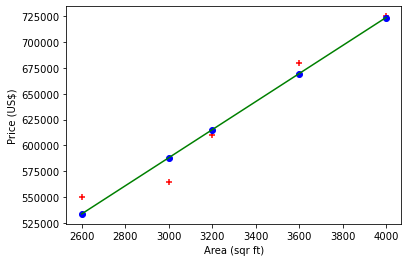

In [22]:
plt.xlabel('Area (sqr ft)')
plt.ylabel('Price (US$)')

plt.scatter(df.area, df.price, color = 'red' , marker = '+')
plt.scatter(df.area, reg.predict(df[['area']]), color = 'blue')
plt.plot(df.area, reg.predict(df[['area']]), color = 'green')


# Linear Regression - Multiple Variable

In [80]:
df = pd.read_csv(r"C:\Users\moses\Documents\Git\Trading\Data\ML - basiccode\homeprices_2.txt")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [40]:
import math
median_bedrooms = math.floor(df.bedrooms.median())

# Modify data so that NaN bedroom values are filled with median value
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
#print(df.bedrooms)

# Train reg model
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

print(reg.coef_)
print(reg.intercept_)
reg.predict([[3000, 3, 15]])

[   137.25 -26025.    -6825.  ]
383724.9999999998


c:\Users\moses\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615025.])

#### <font color = 'green'> Excercise <font color = 'white'> <br> Hiring prediction

###### Predict salaries of candidates: <br>- 2 yrs experience, 9 test score, 6 interview test score <br>- 12 yrs experience, 10 test score, 10 interview test score

In [81]:
from word2number import w2n
import math
df = pd.read_csv(r"C:\Users\moses\Documents\Git\Trading\Data\ML - basiccode\hiring_2.txt")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [82]:
# Fill NaN columns with zero experience
df.experience = df.experience.fillna('zero')
# Converting all strings to numbers
df.experience = df.experience.apply(w2n.word_to_num)

In [83]:
# Fill NaN test values with median value
median_scores = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_scores)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [84]:
# Create regex model
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)' ]], df['salary($)'])

LinearRegression()

In [85]:
# Predict salaries
reg.predict([[2, 9, 6]])
reg.predict([[12, 10, 10]])

c:\Users\moses\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\moses\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

# Gradient Descent and Cost Function